In [1]:
import json
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import os

# text processing packages
import re, string, unicodedata
import nltk
#from pycontractions import Contractions # converting contractions to words
import inflect # converting integers to numbers
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')


In [ ]:
'''
NOTES

04.24.
    - created this notebook
'''

# 0. Functions

These are the functions that we will use when we clean, normalize and analyze the lyrics.

In [2]:
def remove_between_square_brackets(text):
    ''' removes text between square brackets '''
    return re.sub('\[[^]]*\]', '', text)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def text_preprocessing(text):
    text = remove_between_square_brackets(text)
    words = nltk.word_tokenize(text)
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

def text_preprocessingF(text):
    ''' this produces words like nt, ai, na, wan'''
    return remove_stopwords(replace_numbers(remove_punctuation(to_lowercase(remove_non_ascii(nltk.word_tokenize(remove_between_square_brackets(text)))))))

def text_preprocessingF2(text):
    ''' this leaves some stopwords '''
    return remove_stopwords(replace_numbers(remove_punctuation(to_lowercase(remove_non_ascii(remove_between_square_brackets(text).split(' '))))))

def join_text(words):
    return ' '.join(words)

def get_dtm(textlist):
    vec = CountVectorizer()
    X = vec.fit_transform(textlist)
    df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names()) 
    return df

In [3]:
def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas

stems, lemmas = stem_and_lemmatize(text_preprocessing(lyrics))
print('Stemmed:\n', stems)
print('\nLemmatized:\n', lemmas)

NameError: name 'lyrics' is not defined

# 1. Reading in the data

After scraping, we have a .json file for each artist. This .json file contains all the scraped songs for the given artist, with the additional metadata: year the song was released, album and title.

In this section we read all artists data into a list.

## One artist

In [4]:
eminem = json.load(open('../CODE/ALLJSON_old/eminem.json'))

In [5]:
eminemsongs = []
for song in eminem['songs']:
    eminemsongs.append(song['lyrics'])

In [6]:
song = eminemsongs[65]

## Most successful artists on Billboard 2006-2018

In the future they will be referenced as 'Billboard Artists'

In [3]:
artists = []

#counter = 1

for filename in os.listdir('../CODE/ALLJSON'):
    artist = json.load(open('../CODE/ALLJSON/' + filename))
    artists.append(artist)
    print('Artist ', filename, ' read!')
    

Artist  21savage.json  read!
Artist  2chainz.json  read!
Artist  2pac.json  read!
Artist  50cent.json  read!
Artist  6ix9ine.json  read!
Artist  aaprocky.json  read!
Artist  aboogiewitdahoodie.json  read!
Artist  akon.json  read!
Artist  aloeblacc.json  read!
Artist  augustalsina.json  read!
Artist  badmeetsevil.json  read!
Artist  Big L.json  read!
Artist  Big Pun.json  read!
Artist  bigsean.json  read!
Artist  birdman.json  read!
Artist  blackbear.json  read!
Artist  bob.json  read!
Artist  bobbyshmurda.json  read!
Artist  bowwow.json  read!
Artist  brysontiller.json  read!
Artist  bustarhymes.json  read!
Artist  cardib.json  read!
Artist  ceelogreen.json  read!
Artist  chamillionaire.json  read!
Artist  chancetherapper.json  read!
Artist  childishgambino.json  read!
Artist  chrisbrown.json  read!
Artist  chrisettemichele.json  read!
Artist  Common.json  read!
Artist  dejloaf.json  read!
Artist  demfranchizeboyz.json  read!
Artist  desiigner.json  read!
Artist  diddydirtymoney.json  

## Greatest 25 rappers of all time

In the future they will be referenced as 'GOAT artists'
Source: https://www.ranker.com/crowdranked-list/the-greatest-rappers-of-all-time

In [5]:
artists = []

for filename in os.listdir('../Rapper_project/GOATs/JSON'):
    artist = json.load(open('../Rapper_project/GOATs/JSON/' + filename))
    artists.append(artist)

In [6]:
artists[0]

{'artisturl': 'https://www.azlyrics.com/19/2pac.html',
 'name': '2pac',
 'songs': [{'album': '"2Pacalypse Now"',
   'artist': '2Pac',
   'lyrics': "[2Pac (Ice Cube):]\nHard like an erection\n(Young black male)\nHard like an erection\n(Ain't shit to fool with)\nHard like an erection\n(Young black male)\nHard like an erection\n(Ain't shit to fool with)\nYes, niggas! Yes, niggas! Yes, niggas!\nGo, nigga, go!\nHard like an erection\n(Young black male)\nHard like an erection\n(Ain't shit to fool with)\nHard like an erection\n(Young black male)\nHard like an erection\n(Ain't shit to fool with)\n\n[2Pac:]\nYoung black male\nI try to effect by kicking the facts\nAnd stacking much mail\nI'm packing a gat 'cause guys wanna jack\nAnd fuck going to jail\n'Cause I ain't a crook, despite how I look\nI don't sell yayo\nThey judging a brother like covers on books\nFollow me into a flow\nI'm sure you know, which way to go\nI'm hitting 'em out of the doors\nSo slip on the slope, let's skip on the flow\n

# 2. Cleaning

In this section we will preprocess the lyrics and prepare them for analysis.
First we normalize the lyrics by:
    - removing the text between square brackets (example: [Eminem])
    - tokenizing the lyrics to words
    - removing non-ascii characters
    - setting all words to lowercase
    - removing punctuation
    - replacing numerical digits to words (example: 2 -> two)
    - removing stopwords
We store the clean lyrics in a list.

## One artist

In [6]:
cleansongs = []
counter = 1
for song in songs:
    cleansongs.append(join_text(text_preprocessing(song)))
    counter += 1
    print('Song ', counter, ' of ', len(songs), ' processed!')
    
cleansongs[0:3]

Song  2  of  351  processed!
Song  3  of  351  processed!
Song  4  of  351  processed!
Song  5  of  351  processed!
Song  6  of  351  processed!
Song  7  of  351  processed!
Song  8  of  351  processed!
Song  9  of  351  processed!
Song  10  of  351  processed!
Song  11  of  351  processed!
Song  12  of  351  processed!
Song  13  of  351  processed!
Song  14  of  351  processed!
Song  15  of  351  processed!
Song  16  of  351  processed!
Song  17  of  351  processed!
Song  18  of  351  processed!
Song  19  of  351  processed!
Song  20  of  351  processed!
Song  21  of  351  processed!
Song  22  of  351  processed!
Song  23  of  351  processed!
Song  24  of  351  processed!
Song  25  of  351  processed!
Song  26  of  351  processed!
Song  27  of  351  processed!
Song  28  of  351  processed!
Song  29  of  351  processed!
Song  30  of  351  processed!
Song  31  of  351  processed!
Song  32  of  351  processed!
Song  33  of  351  processed!
Song  34  of  351  processed!
Song  35  of  351 

['oh yeah eminem baby back motherfucking ass one time motherfucking mind represent three hundred and thirteen know saying cause nt know shit ninety-six ayo pen paper cause chain reaction get brain relaxing zany acting maniac action brainiac fact son mainly lack attraction look insanely whack fraction tracks run rhyming skills got climbing hills travel mind spine like siren drills sliming grills roaches sprayed disinfectants twist necks rappers til spinal column disconnects put decks check monologue turn system twist indulge marijuana smoke season noise pollution contamination examination cartoons animation lamination narration hit snare bass track fucked rapper interrogation declare invasion ai nt time stare gazing turn stage barren wasteland infinite heard hell well sent went serving sentence murderin instruments trying repent hear beat tempted make another attempt infinite bust let beat commence beat sense elite defense got meat mince crew stomp two feet rinse greet gents ladies spoi

In [ ]:
''' Compare functionally coded and simple preprocessing'''

In [176]:
start_time = time.time()
cleansongs = []
counter = 1
for song in songs:
    cleansongs.append(join_text(text_preprocessing(song)))
    counter += 1
    print('Song ', counter, ' of ', len(songs), ' processed!')

print("--- %s seconds ---" % (time.time() - start_time))

Song  2  of  351  processed!
Song  3  of  351  processed!
Song  4  of  351  processed!
Song  5  of  351  processed!
Song  6  of  351  processed!
Song  7  of  351  processed!
Song  8  of  351  processed!
Song  9  of  351  processed!
Song  10  of  351  processed!
Song  11  of  351  processed!
Song  12  of  351  processed!
Song  13  of  351  processed!
Song  14  of  351  processed!
Song  15  of  351  processed!
Song  16  of  351  processed!
Song  17  of  351  processed!
Song  18  of  351  processed!
Song  19  of  351  processed!
Song  20  of  351  processed!
Song  21  of  351  processed!
Song  22  of  351  processed!
Song  23  of  351  processed!
Song  24  of  351  processed!
Song  25  of  351  processed!
Song  26  of  351  processed!
Song  27  of  351  processed!
Song  28  of  351  processed!
Song  29  of  351  processed!
Song  30  of  351  processed!
Song  31  of  351  processed!
Song  32  of  351  processed!
Song  33  of  351  processed!
Song  34  of  351  processed!
Song  35  of  351 

In [182]:
start_time = time.time()
cleansongs = []
counter = 1
for song in songs:
    cleansongs.append(join_text(text_preprocessingF(song)))
    counter += 1
    print('Song ', counter, ' of ', len(songs), ' processed!')
    
print("--- %s seconds ---" % (time.time() - start_time))

Song  2  of  351  processed!
Song  3  of  351  processed!
Song  4  of  351  processed!
Song  5  of  351  processed!
Song  6  of  351  processed!
Song  7  of  351  processed!
Song  8  of  351  processed!
Song  9  of  351  processed!
Song  10  of  351  processed!
Song  11  of  351  processed!
Song  12  of  351  processed!
Song  13  of  351  processed!
Song  14  of  351  processed!
Song  15  of  351  processed!
Song  16  of  351  processed!
Song  17  of  351  processed!
Song  18  of  351  processed!
Song  19  of  351  processed!
Song  20  of  351  processed!
Song  21  of  351  processed!
Song  22  of  351  processed!
Song  23  of  351  processed!
Song  24  of  351  processed!
Song  25  of  351  processed!
Song  26  of  351  processed!
Song  27  of  351  processed!
Song  28  of  351  processed!
Song  29  of  351  processed!
Song  30  of  351  processed!
Song  31  of  351  processed!
Song  32  of  351  processed!
Song  33  of  351  processed!
Song  34  of  351  processed!
Song  35  of  351 

## All artists

In [8]:
cleansongs = []
for artist in artists:
    for song in artist['songs']:
        try:
            song['artist'] = artist['name'] # at scraping there some songs got multiple artists
        except:
            song['artist'] = artist['simplename'] # used new column names with the newly scraped artists
        lyrics = song['lyrics']
        cleansongs.append(join_text(text_preprocessingF(lyrics)))
    try:
        print('Artist ', artist['name'], ' done!')
    except:
        print('Artist ', artist['simplename'], ' done!')

Artist  21savage  done!
Artist  2chainz  done!
Artist  2pac  done!
Artist  50cent  done!
Artist  6ix9ine  done!
Artist  aaprocky  done!
Artist  aboogiewitdahoodie  done!
Artist  akon  done!
Artist  aloeblacc  done!
Artist  augustalsina  done!
Artist  badmeetsevil  done!
Artist  Big L  done!
Artist  Big Pun  done!
Artist  bigsean  done!
Artist  birdman  done!
Artist  blackbear  done!
Artist  bob  done!
Artist  bobbyshmurda  done!
Artist  bowwow  done!
Artist  brysontiller  done!
Artist  bustarhymes  done!
Artist  cardib  done!
Artist  ceelogreen  done!
Artist  chamillionaire  done!
Artist  chancetherapper  done!
Artist  childishgambino  done!
Artist  chrisbrown  done!
Artist  chrisettemichele  done!
Artist  Common  done!
Artist  dejloaf  done!
Artist  demfranchizeboyz  done!
Artist  desiigner  done!
Artist  diddydirtymoney  done!
Artist  djkhaled  done!
Artist  DMX  done!
Artist  drake  done!
Artist  dram  done!
Artist  drdre  done!
Artist  Eazy-E  done!
Artist  ellamai  done!
Artist  e

In [9]:
cleansongs[1]

'pull yo trap niggas scatter like roaches clothes french drug dealers vultures sippin coffee cup ai nt folgers know still mad brick sold cook brick went bought rollsie playin rock like real name hova ak47 still strapped shoulder niggas tote choppers like niggas magnolia fucked nigga bitch fucked another nigga bitch gettin money fuck nigga bitch vvs diamonds done flooded wrist ai nt talkin bout toronto say six know hard pimp tryna get money brick reaching pocket feelin lit fuck running niggas shit codeine gas money spent bands ai nt even got zip homeboys fuckin bitch fuck better take nigga shit take nigga shit better take nigga shit took nigga shit flooded wrist rappin ass nigga ai nt really shit ai nt never sold coke ai nt never hit lick ca nt buy brick man street done left thinkin nothin man pull like secret service nothin bout sticks mess twenty-one savage gon put list know hard pimp tryna get money brick reaching pocket feelin lit fuck running niggas shit codeine gas money spent ban

In [10]:
len(cleansongs)

27241

In [11]:
pd.DataFrame(artists[0]['songs']).groupby('artist').first()

,url,artistscore,album,title,year,lyrics
artist,,,,,,
21savage,https://www.azlyrics.com/lyrics/21savage/skirt...,59,"""The Slaughter Tape""","""Skirtt Skirtt""",2015,Skirt skirt\nSkirt skirt\n\nSkirt skirt\nSkirt...


Save the cleaned songs

In [12]:
json.dump(cleansongs, open('cleansongs.json', 'w'))

Load the saved clean songs

In [3]:
cleansongs = json.load(open('../CODE/cleansongs.json'))

In [4]:
len(cleansongs)

15546

## GOAT artists

In [11]:
cleansongs = []
for artist in artists:
    for song in artist['songs']:
        song['artist'] = artist['name'] # at scraping there some songs got multiple artists
        lyrics = song['lyrics']
        cleansongs.append(join_text(text_preprocessingF(lyrics)))
    print('Artist ', artist['name'], ' done!')

Artist  2pac  done!
Artist  50cent  done!
Artist  aaprocky  done!
Artist  Busta Rhymes  done!
Artist  DMX  done!
Artist  Dr. Dre  done!
Artist  Eazy-E  done!
Artist  eminem  done!
Artist  Ghostface Killah  done!
Artist  Ice Cube  done!
Artist  jayz  done!
Artist  jcole  done!
Artist  kanyewest  done!
Artist  kendricklamar  done!
Artist  lilwayne  done!
Artist  LL Cool J  done!
Artist  ludacris  done!
Artist  Method Man  done!
Artist  Mos Def  done!
Artist  Nas  done!
Artist  Notorius B.I.G.  done!
Artist  Outkast  done!
Artist  Rakim  done!
Artist  snoopdogg  done!
Artist  ti  done!


In [12]:
cleansongs[1]

'know got trapped prison seclusion happiness living streets delusion even smooth criminal one day must get caught shot shot bullet bought nine millimeter kickin thinkin streets cause never talk peace black community know violence job silence walk city streets like rat pack tyrants many brothers daily heading big pen niggas comin worseoff went years done lot growin getting drunk throwin cuffed said enough must another route way money fame changed name played different game tired trapped vicious cycle one cop harasses might go psycho get em hit em bum rush lunatic would like see skull crushed yo smart really let go g keep cooped ghetto catch uzi got trapped uh uh ca nt keep black man got trapped naw ca nt keep black man trapped uh uh ca nt keep black man trapped naw ca nt keep black man got trapped barely walk city streets without cop harassing searching asking identity hands throw wall nt thing telling one day suckers got ta fall cuffed throw concrete coppers try kill nt know wrong stre

In [13]:
len(cleansongs)

5617

In [14]:
json.dump(cleansongs, open('GOAT_cleansongs.json', 'w'))

In [ ]:
cleansongs = json.load(open('../Rapper_project/cleansongs.json'))

# 3. Document-Term Matrix

Now we create the Document-Term Matrix from the list of clean songs.
The number in column i of row j represents how many times term i can be found in document j.

In [13]:
dtm = get_dtm(cleansongs)
print(dtm.shape)

(27241, 104700)


Let's count the non-zero values of the DTM.

In [14]:
nonzerocount2 = 0
for column in dtm:
    nonzerocount2 += np.count_nonzero(dtm[column])
    
print(nonzerocount2)

4041340


In [15]:
print(((dtm.shape[0]*dtm.shape[1])-2522103)/(dtm.shape[0]*dtm.shape[1]), ' % of our DTM is 0s')

0.9991157133046439  % of our DTM is 0s


See the total number of words in the corpus

In [73]:
wordsum = 0
for column in dtm:
    wordsum += dtm[column].sum()

print(wordsum)

4111302


We remove words with less than 10 occurences across the entire corpus

In [16]:
under10 = []

for column in dtm:
    if dtm[column].sum() < 10:
        under10.append(column)
        
dtm2 = dtm.drop(columns = under10)

print(len(under10), ' columns dropped.')
print(dtm2.shape, ' is the shape of the new DTM. This means there are ', dtm2.shape[1], ' unique words.')

nonzerocount3 = 0
for column in dtm2:
    nonzerocount3 += np.count_nonzero(dtm2[column])
    
print(nonzerocount3, ' is the number of non-zero values in the DTM.')
print('This means, that')
print(((dtm2.shape[0]*dtm2.shape[1])-nonzerocount3)/(dtm2.shape[0]*dtm2.shape[1]), ' % of our DTM is 0s')

wordsum2 = 0
for column in dtm2:
    wordsum2 += dtm2[column].sum()

print(wordsum2, ' is the total number of words in the corpus.')

82853  columns dropped.
(27241, 21847)  is the shape of the new DTM. This means there are  21847  unique words.
3883003  is the number of non-zero values in the DTM.
This means, that
0.9934754153327188  % of our DTM is 0s
7075108  is the total number of words in the corpus.


In [17]:
print('We dropped ', ((len(under10) * dtm.shape[0]) / (dtm.shape[0]*dtm.shape[1]))*100, '% of the DTM')

We dropped  79.13371537726839 % of the DTM


In [18]:
dtm2.sum().sort_values(ascending = False)[0:40]

nt        189804
like      123459
got       116122
get        83227
know       80616
nigga      74874
ai         62054
yeah       61376
shit       49937
niggas     46991
bitch      45590
na         45568
fuck       44992
go         43632
love       39673
cause      39302
one        38879
see        38469
back       38363
let        37349
make       35822
money      34907
baby       34114
wan        31387
gon        30864
man        30208
girl       30167
say        30155
em         29473
want       29448
ya         29058
never      28403
time       27996
ca         27907
right      26354
come       25450
tell       25123
take       24934
need       23813
oh         23764
dtype: int64

Drop faulty / nonsense words that are produced by the imperfection of the tokenize package

In [19]:
to_drop = ['nt', 'ai', 'na', 'wan', 'ca']

In [27]:
dtm2.drop(columns = to_drop, inplace = True)

Save the DTM

In [28]:
dtm2.to_csv('DTM_FINAL.csv', sep = ';')

In [23]:
import gc

In [25]:
del dtm

In [26]:
gc.collect()

40

## Merging the metadata to the DTM

### Example with small subset

In [33]:
metadatadf = pd.DataFrame(eminem['songs'])
metadatadf.head(3)

,album,artist,artistscore,lyrics,title,url,year
0,"""Infinite""",Eminem,327,"Oh yeah, this is Eminem baby, back up in that ...","""Infinite""",https://www.azlyrics.com/lyrics/eminem/infinit...,1996
1,"""Infinite""",Eminem,327,[old school hip-hop beat tune plays in the bac...,"""W.E.G.O. (Interlude)""",https://www.azlyrics.com/lyrics/eminem/wegoint...,1996
2,"""Infinite""",Eminem,327,"[Eye-Kyu:] Check it out, \n[Eminem:] Hey Kyu!\...","""It's Ok""",https://www.azlyrics.com/lyrics/eminem/itsok.html,1996


In [63]:
metadatadf = metadatadf.rename(index = str, columns={"album" : "ALBUM",
                                                     "artist": "ARTIST",
                                                     "lyrics" : "LYRICS",
                                                     "title" : "TITLE",
                                                     "year" : "YEAR",
                                                     "url" : "URL",
                                                     "artistscore" : "ARTISTSCORE"})

In [69]:
smeta = metadatadf.head(5)
sdtm = dtm.head(5)

In [73]:
smeta.join(sdtm)

,ALBUM,ARTIST,ARTISTSCORE,LYRICS,TITLE,URL,YEAR,100yard,10th,10year,...,zoe,zombie,zombieieie,zombies,zone,zoneout,zonin,zoo,zoom,zu
0,"""Infinite""",Eminem,327,"Oh yeah, this is Eminem baby, back up in that ...","""Infinite""",https://www.azlyrics.com/lyrics/eminem/infinit...,1996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""Infinite""",Eminem,327,[old school hip-hop beat tune plays in the bac...,"""W.E.G.O. (Interlude)""",https://www.azlyrics.com/lyrics/eminem/wegoint...,1996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""Infinite""",Eminem,327,"[Eye-Kyu:] Check it out, \n[Eminem:] Hey Kyu!\...","""It's Ok""",https://www.azlyrics.com/lyrics/eminem/itsok.html,1996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""Infinite""",Eminem,327,"[Eye-Kyu:] Now what you know about a sweet MC,...","""313""",https://www.azlyrics.com/lyrics/eminem/313.html,1996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"""Infinite""",Eminem,327,"[Women Singing:]\nTonight, Tonight, Tonight, T...","""Tonight""",https://www.azlyrics.com/lyrics/eminem/tonight...,1996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
pd.concat([smeta, sdtm], axis=1)

,ALBUM,ARTIST,ARTISTSCORE,LYRICS,TITLE,URL,YEAR,100yard,10th,10year,...,zoe,zombie,zombieieie,zombies,zone,zoneout,zonin,zoo,zoom,zu
0,"""Infinite""",Eminem,327.0,"Oh yeah, this is Eminem baby, back up in that ...","""Infinite""",https://www.azlyrics.com/lyrics/eminem/infinit...,1996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""Infinite""",Eminem,327.0,[old school hip-hop beat tune plays in the bac...,"""W.E.G.O. (Interlude)""",https://www.azlyrics.com/lyrics/eminem/wegoint...,1996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""Infinite""",Eminem,327.0,"[Eye-Kyu:] Check it out, \n[Eminem:] Hey Kyu!\...","""It's Ok""",https://www.azlyrics.com/lyrics/eminem/itsok.html,1996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""Infinite""",Eminem,327.0,"[Eye-Kyu:] Now what you know about a sweet MC,...","""313""",https://www.azlyrics.com/lyrics/eminem/313.html,1996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"""Infinite""",Eminem,327.0,"[Women Singing:]\nTonight, Tonight, Tonight, T...","""Tonight""",https://www.azlyrics.com/lyrics/eminem/tonight...,1996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Something is not right, we should add an index column to make sure it works.

In [162]:
smeta['ind'] = np.linspace(0,4,5, dtype = int)
smeta

,ALBUM,ARTIST,ARTISTSCORE,LYRICS,TITLE,URL,YEAR,ind
0,"""Infinite""",Eminem,327,"Oh yeah, this is Eminem baby, back up in that ...","""Infinite""",https://www.azlyrics.com/lyrics/eminem/infinit...,1996,0
1,"""Infinite""",Eminem,327,[old school hip-hop beat tune plays in the bac...,"""W.E.G.O. (Interlude)""",https://www.azlyrics.com/lyrics/eminem/wegoint...,1996,1
2,"""Infinite""",Eminem,327,"[Eye-Kyu:] Check it out, \n[Eminem:] Hey Kyu!\...","""It's Ok""",https://www.azlyrics.com/lyrics/eminem/itsok.html,1996,2
3,"""Infinite""",Eminem,327,"[Eye-Kyu:] Now what you know about a sweet MC,...","""313""",https://www.azlyrics.com/lyrics/eminem/313.html,1996,3
4,"""Infinite""",Eminem,327,"[Women Singing:]\nTonight, Tonight, Tonight, T...","""Tonight""",https://www.azlyrics.com/lyrics/eminem/tonight...,1996,4


In [164]:
sdtm['ind'] = np.linspace(0,4,5, dtype = int)
sdtm

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,100yard,10th,10year,12yearold,17yearold,1800i,19th,1st,20s,20yearold,...,zombie,zombieieie,zombies,zone,zoneout,zonin,zoo,zoom,zu,ind
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [165]:
pd.merge(smeta, sdtm, on='ind')

,ALBUM,ARTIST,ARTISTSCORE,LYRICS,TITLE,URL,YEAR,ind,100yard,10th,...,zoe,zombie,zombieieie,zombies,zone,zoneout,zonin,zoo,zoom,zu
0,"""Infinite""",Eminem,327,"Oh yeah, this is Eminem baby, back up in that ...","""Infinite""",https://www.azlyrics.com/lyrics/eminem/infinit...,1996,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""Infinite""",Eminem,327,[old school hip-hop beat tune plays in the bac...,"""W.E.G.O. (Interlude)""",https://www.azlyrics.com/lyrics/eminem/wegoint...,1996,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"""Infinite""",Eminem,327,"[Eye-Kyu:] Check it out, \n[Eminem:] Hey Kyu!\...","""It's Ok""",https://www.azlyrics.com/lyrics/eminem/itsok.html,1996,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"""Infinite""",Eminem,327,"[Eye-Kyu:] Now what you know about a sweet MC,...","""313""",https://www.azlyrics.com/lyrics/eminem/313.html,1996,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"""Infinite""",Eminem,327,"[Women Singing:]\nTonight, Tonight, Tonight, T...","""Tonight""",https://www.azlyrics.com/lyrics/eminem/tonight...,1996,4,0,0,...,0,0,0,0,0,0,0,0,0,0


It works now!

### With all songs of the artist

In [168]:
metadatadf['ind'] = np.linspace(0,len(songs)-1,len(songs), dtype = int)
dtm['ind'] = np.linspace(0,len(songs)-1,len(songs), dtype = int)

mergeddf = pd.merge(metadatadf, dtm, on='ind')
mergeddf.head(5)

,ALBUM,ARTIST,ARTISTSCORE,LYRICS,TITLE,URL,YEAR,ind,100yard,10th,...,zoe,zombie,zombieieie,zombies,zone,zoneout,zonin,zoo,zoom,zu
0,"""Infinite""",Eminem,327,"Oh yeah, this is Eminem baby, back up in that ...","""Infinite""",https://www.azlyrics.com/lyrics/eminem/infinit...,1996,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""Infinite""",Eminem,327,[old school hip-hop beat tune plays in the bac...,"""W.E.G.O. (Interlude)""",https://www.azlyrics.com/lyrics/eminem/wegoint...,1996,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"""Infinite""",Eminem,327,"[Eye-Kyu:] Check it out, \n[Eminem:] Hey Kyu!\...","""It's Ok""",https://www.azlyrics.com/lyrics/eminem/itsok.html,1996,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"""Infinite""",Eminem,327,"[Eye-Kyu:] Now what you know about a sweet MC,...","""313""",https://www.azlyrics.com/lyrics/eminem/313.html,1996,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"""Infinite""",Eminem,327,"[Women Singing:]\nTonight, Tonight, Tonight, T...","""Tonight""",https://www.azlyrics.com/lyrics/eminem/tonight...,1996,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
dropcolumns = ['ARTISTSCORE', 'LYRICS', 'URL', 'ind']

In [174]:
mergeddf.drop(columns = dropcolumns).groupby('ALBUM').sum()

,100yard,10th,10year,12yearold,17yearold,1800i,19th,1st,20s,20yearold,...,zoe,zombie,zombieieie,zombies,zone,zoneout,zonin,zoo,zoom,zu
ALBUM,,,,,,,,,,,,,,,,,,,,,
,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,4,0,0,1,1,1
"""Curtain Call: The Hits""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""Eminem Presents The Re-Up""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
"""Encore""",0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
"""Infinite""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""Kamikaze""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
"""Recovery""",0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
"""Relapse""",0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""Relapse: Refill""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Billboard artists * Actually all

In [34]:
artists[0]['songs']

[{'url': 'https://www.azlyrics.com/lyrics/21savage/skirttskirtt.html',
  'artist': '21Savage',
  'artistscore': 59,
  'album': '"The Slaughter Tape"',
  'title': '"Skirtt Skirtt"',
  'year': 2015,
  'lyrics': "Skirt skirt\nSkirt skirt\n\nSkirt skirt\nSkirt skirt\nSkirt skirt\nSkirt skirt\nSkirt skirt\nSkirt skirt\nSkirt skirt\nSkirt skirt\nSkirt skirt\nSkirt skirt\nSkirt skirt\nSkirt skirt\nSkirt\nSkirt\nSkirt skirt\nSkirt skirt\n\nCooking up dope in Givenchys, all my niggas counting benjis\nPull up on you with the sticks nigga, we gon' handle business\nI know a lot of niggas out here say they worth a mill ticket\nI guess everybody rich, you a goddamn liar\nTook the stand on your right hand man, so you had to die\nLost a lot of my real niggas so I had to cry\n21 and that sex money what I live by\nGlock 40 with the 30 round and a red dot\nYoung nigga went from hotboxing to a trap spot\nNiggas clutching on the choppers every time the fuckin' door knock\nSantan molly that'll make your fuc

In [29]:
songlist = []
for artist in artists:
    #for song in artist['songs']:
    #    song['artist'] = artist['name'] -> this is already done at the cleaning
    songlist = songlist + artist['songs']
    
print(len(songlist))

27241


In [30]:
metadatadf = pd.DataFrame(songlist)
metadatadf['cleanlyrics'] = cleansongs
metadatadf.head(3)

,url,artist,artistscore,album,title,year,lyrics,cleanlyrics
0,https://www.azlyrics.com/lyrics/21savage/skirt...,21savage,59.0,"""The Slaughter Tape""","""Skirtt Skirtt""",2015,Skirt skirt\nSkirt skirt\n\nSkirt skirt\nSkirt...,skirt skirt skirt skirt skirt skirt skirt skir...
1,https://www.azlyrics.com/lyrics/21savage/pimp....,21savage,59.0,"""The Slaughter Tape""","""Pimp""",2015,Pull up in yo\nTrap niggas scatter like roache...,pull yo trap niggas scatter like roaches cloth...
2,https://www.azlyrics.com/lyrics/21savage/gang....,21savage,59.0,"""The Slaughter Tape""","""Gang""",2015,Gang [x14]\n\nGang [x8]\nBitch you can't hang ...,gang gang bitch ca nt hang gang nt give fuck b...


In [33]:
metadatadf.groupby('artist').first().shape

(155, 7)

In [34]:
metadatadf = metadatadf.rename(index = str, columns={"album" : "ALBUM",
                                                     "artist": "ARTIST",
                                                     "lyrics" : "LYRICS",
                                                     "cleanlyrics" : "CLEANLYRICS",
                                                     "title" : "TITLE",
                                                     "year" : "YEAR",
                                                     "url" : "URL",
                                                     "artistscore" : "ARTISTSCORE"})
metadatadf.head(3)

,URL,ARTIST,ARTISTSCORE,ALBUM,TITLE,YEAR,LYRICS,CLEANLYRICS
0,https://www.azlyrics.com/lyrics/21savage/skirt...,21savage,59.0,"""The Slaughter Tape""","""Skirtt Skirtt""",2015,Skirt skirt\nSkirt skirt\n\nSkirt skirt\nSkirt...,skirt skirt skirt skirt skirt skirt skirt skir...
1,https://www.azlyrics.com/lyrics/21savage/pimp....,21savage,59.0,"""The Slaughter Tape""","""Pimp""",2015,Pull up in yo\nTrap niggas scatter like roache...,pull yo trap niggas scatter like roaches cloth...
2,https://www.azlyrics.com/lyrics/21savage/gang....,21savage,59.0,"""The Slaughter Tape""","""Gang""",2015,Gang [x14]\n\nGang [x8]\nBitch you can't hang ...,gang gang bitch ca nt hang gang nt give fuck b...


In [35]:
metadatadf.to_csv('songs_dataframe_FINAL.csv', sep = ';')

In [37]:
metadatadf['ind'] = np.linspace(0,dtm2.shape[0]-1,dtm2.shape[0], dtype = int)
dtm2['ind'] = np.linspace(0,dtm2.shape[0]-1,dtm2.shape[0], dtype = int)

mergeddf = pd.merge(metadatadf, dtm2, on='ind')
mergeddf.head(5)

,URL,ARTIST,ARTISTSCORE,ALBUM,TITLE,YEAR,LYRICS,CLEANLYRICS,ind,00n9na,...,zoovier,zoowap,zoro,zorro,zro,zs,zsa,zu,zulu,zuzu
0,https://www.azlyrics.com/lyrics/21savage/skirt...,21savage,59.0,"""The Slaughter Tape""","""Skirtt Skirtt""",2015,Skirt skirt\nSkirt skirt\n\nSkirt skirt\nSkirt...,skirt skirt skirt skirt skirt skirt skirt skir...,0,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.azlyrics.com/lyrics/21savage/pimp....,21savage,59.0,"""The Slaughter Tape""","""Pimp""",2015,Pull up in yo\nTrap niggas scatter like roache...,pull yo trap niggas scatter like roaches cloth...,1,0,...,0,0,0,0,0,0,0,0,0,0
2,https://www.azlyrics.com/lyrics/21savage/gang....,21savage,59.0,"""The Slaughter Tape""","""Gang""",2015,Gang [x14]\n\nGang [x8]\nBitch you can't hang ...,gang gang bitch ca nt hang gang nt give fuck b...,2,0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.azlyrics.com/lyrics/21savage/picky...,21savage,59.0,"""The Slaughter Tape""","""Picky""",2015,I'm so motherfucking picky\nShe ain't fucking ...,motherfucking picky ai nt fucking dipping ai n...,3,0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.azlyrics.com/lyrics/21savage/slaug...,21savage,59.0,"""The Slaughter Tape""","""Slaughter Your Daughter""",2015,[21 Savage:]\nMy pinky ring (slaughter your da...,pinky ring slaughter daughter quarter slaughte...,4,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
mergeddf.shape

(27241, 21850)

## GOAT artists

In [26]:
songlist = []
for artist in artists:
    songlist = songlist + artist['songs']
    
print(len(songlist))

5617


In [27]:
metadatadf = pd.DataFrame(songlist)
metadatadf.head(3)

,album,artist,artistscore,lyrics,title,url,year
0,"""2Pacalypse Now""",2pac,NaN,[2Pac (Ice Cube):]\nHard like an erection\n(Yo...,"""Young Black Male""",NaN,1991
1,"""2Pacalypse Now""",2pac,NaN,You know they got me trapped in this prison of...,"""Trapped""",NaN,1991
2,"""2Pacalypse Now""",2pac,NaN,"[2Pac (2Pac as ""Soulja""):]\nAll you wanted to ...","""Soulja's Story""",NaN,1991


In [28]:
metadatadf = metadatadf.rename(index = str, columns={"album" : "ALBUM",
                                                     "artist": "ARTIST",
                                                     "lyrics" : "LYRICS",
                                                     "title" : "TITLE",
                                                     "year" : "YEAR",
                                                     "url" : "URL",
                                                     "artistscore" : "ARTISTSCORE"})
metadatadf.head(3)

,ALBUM,ARTIST,ARTISTSCORE,LYRICS,TITLE,URL,YEAR
0,"""2Pacalypse Now""",2pac,NaN,[2Pac (Ice Cube):]\nHard like an erection\n(Yo...,"""Young Black Male""",NaN,1991
1,"""2Pacalypse Now""",2pac,NaN,You know they got me trapped in this prison of...,"""Trapped""",NaN,1991
2,"""2Pacalypse Now""",2pac,NaN,"[2Pac (2Pac as ""Soulja""):]\nAll you wanted to ...","""Soulja's Story""",NaN,1991


In [29]:
metadatadf['ind'] = np.linspace(0,dtm.shape[0]-1,dtm.shape[0], dtype = int)
dtm2['ind'] = np.linspace(0,dtm.shape[0]-1,dtm.shape[0], dtype = int)

mergeddf = pd.merge(metadatadf, dtm2, on='ind')
mergeddf.head(5)

,ALBUM,ARTIST,ARTISTSCORE,LYRICS,TITLE,URL,YEAR,ind,100k,10th,...,zipped,zipper,zombie,zombies,zone,zones,zonin,zoo,zoom,zulu
0,"""2Pacalypse Now""",2pac,NaN,[2Pac (Ice Cube):]\nHard like an erection\n(Yo...,"""Young Black Male""",NaN,1991,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""2Pacalypse Now""",2pac,NaN,You know they got me trapped in this prison of...,"""Trapped""",NaN,1991,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"""2Pacalypse Now""",2pac,NaN,"[2Pac (2Pac as ""Soulja""):]\nAll you wanted to ...","""Soulja's Story""",NaN,1991,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"""2Pacalypse Now""",2pac,NaN,"[Skit:]\n""What's up?""\n""Yo this scene, rollers...","""I Don't Give A Fuck""",NaN,1991,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"""2Pacalypse Now""",2pac,NaN,They claim that I'm violent\nJust 'cause I ref...,"""Violent""",NaN,1991,4,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4. Result

We have a DTM with the corresponding metadata for each song.
We save this to a .csv file

In [39]:
mergeddf.to_csv('DTM_with_meta_FINAL.csv', sep=';')

In [30]:
mergeddf.to_csv('GOAT_DTM_with_meta.csv', sep=';')

In [49]:
metadatadf[['ARTIST', 'ARTISTSCORE']].groupby('ARTIST').first().to_csv('artistlist.csv', sep =';')

In [50]:
metadatadf[['ARTIST', 'ARTISTSCORE']].groupby('ARTIST').first()

,ARTISTSCORE
ARTIST,
21savage,59.0
2chainz,151.0
2pac,NaN
50cent,69.0
6ix9ine,37.0
...,...
youngboyneverbrokeagain,33.0
youngjeezy,142.0
youngmoney,48.0


# X. Mom's Spaghetti

In [138]:
c = Counter(remove_stopwords(to_lowercase(remove_punctuation(nltk.word_tokenize(remove_between_square_brackets(songs[19])))))).most_common()

In [139]:
mynameis ={}
for i,j in c[0:20]:
    mynameis[i] = j

In [140]:
mynameis

{'ahh': 3,
 'chkachka': 16,
 'fuck': 3,
 'get': 5,
 'girl': 2,
 'head': 2,
 'hi': 17,
 'huh': 11,
 'life': 3,
 'like': 6,
 'na': 3,
 'name': 49,
 'nt': 5,
 'one': 2,
 'see': 2,
 'shady': 18,
 'slim': 17,
 'try': 2,
 'wan': 2,
 'yeah': 6}

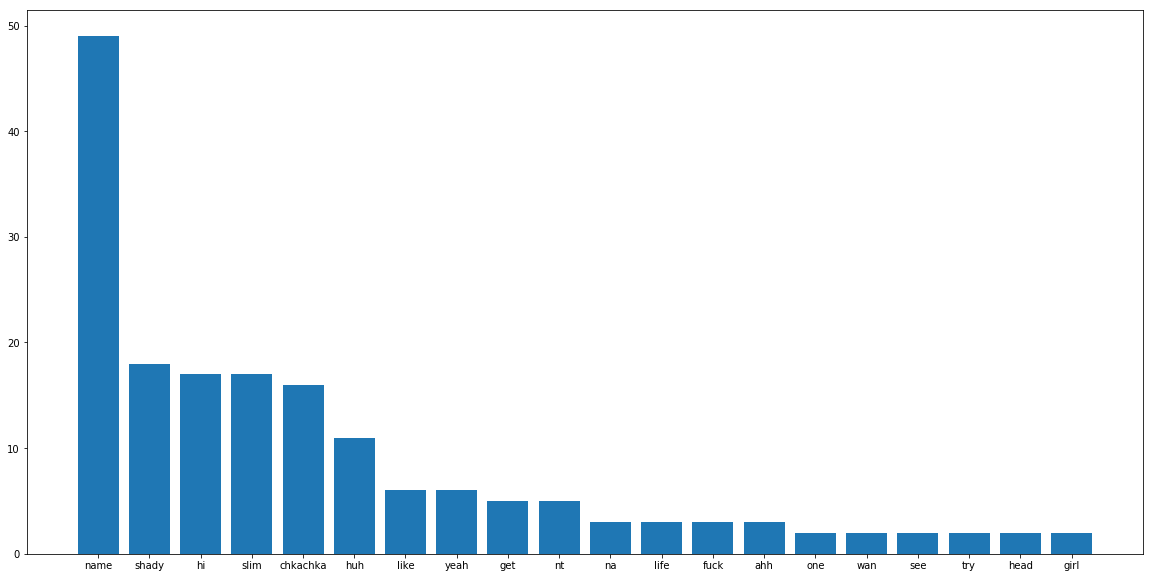

In [141]:
D = mynameis

plt.figure(figsize = (20,10))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))


plt.show()

In [17]:
Counter(text_preprocessingF(songs[19])).most_common(10)

[('name', 49),
 ('shady', 18),
 ('hi', 17),
 ('slim', 17),
 ('chkachka', 16),
 ('huh', 11),
 ('like', 6),
 ('yeah', 6),
 ('get', 5),
 ('nt', 5)]

In [18]:
Counter(stem_words(text_preprocessingF(songs[19]))).most_common(10)

[('nam', 49),
 ('shady', 18),
 ('hi', 17),
 ('slim', 17),
 ('chkachka', 16),
 ('huh', 11),
 ('lik', 6),
 ('yeah', 6),
 ('get', 5),
 ('nt', 5)]

In [19]:
Counter(lemmatize_verbs(text_preprocessingF(songs[19]))).most_common(10)

[('name', 49),
 ('shady', 18),
 ('hi', 17),
 ('slim', 17),
 ('chkachka', 16),
 ('huh', 11),
 ('get', 7),
 ('like', 6),
 ('yeah', 6),
 ('nt', 5)]

In [26]:
Counter(remove_punctuation(lemmatize_verbs(remove_stopwords(nltk.word_tokenize(remove_between_square_brackets(songs[19])))))).most_common()

[('name', 49),
 ('I', 37),
 ('My', 34),
 ('Shady', 18),
 ('Hi', 17),
 ('Slim', 17),
 ('chkachka', 16),
 ('huh', 9),
 ('like', 6),
 ('s', 6),
 ('get', 5),
 ('nt', 5),
 ('And', 5),
 ('m', 4),
 ('Yeah', 3),
 ('yeah', 3),
 ('na', 3),
 ('fuck', 3),
 ('life', 3),
 ('ll', 3),
 ('one', 2),
 ('kid', 2),
 ('Wan', 2),
 ('see', 2),
 ('stick', 2),
 ('Huh', 2),
 ('head', 2),
 ('want', 2),
 ('Oh', 2),
 ('Dr', 2),
 ('Dre', 2),
 ('face', 2),
 ('Cause', 2),
 ('piss', 2),
 ('rip', 2),
 ('tits', 2),
 ('smack', 2),
 ('fat', 2),
 ('Come', 2),
 ('scream', 2),
 ('thank', 2),
 ('You', 2),
 ('stand', 2),
 ('ahh', 2),
 ('autograph', 2),
 ('ai', 2),
 ('Excuse', 1),
 ('Can', 1),
 ('attention', 1),
 ('class', 1),
 ('second', 1),
 ('violence', 1),
 ('Nine', 1),
 ('Inch', 1),
 ('Nails', 1),
 ('eyelids', 1),
 ('Uhhuh', 1),
 ('copy', 1),
 ('exactly', 1),
 ('Try', 1),
 ('cid', 1),
 ('worse', 1),
 ('brain', 1),
 ('dead', 1),
 ('weight', 1),
 ('tryna', 1),
 ('straight', 1),
 ('But', 1),
 ('ca', 1),
 ('figure', 1),
 ('Spic

In [22]:
dtm2.sum().sort_values(ascending = False)[25:50]

want     17087
never    16218
em       16205
time     15979
ya       15919
ca       15719
right    15441
tell     14747
oh       14687
take     14586
need     14088
come     14050
put      13073
keep     12378
way      11827
ta       11591
real     10666
life     10599
look     10441
hit       9949
still     9842
feel      9699
could     9691
give      9688
call      9539
dtype: int64

In [166]:
dropcolumns = ['ARTISTSCORE', 'LYRICS', 'URL', 'ind']
mergeddf[['ARTIST', 'fuck', 'shit', 'bitch', 'cunt', 'dick']].groupby('ARTIST').sum()

,fuck,shit,bitch,cunt,dick
ARTIST,,,,,
21savage,223,318,589,0,49
2chainz,333,440,533,0,42
50cent,623,1025,679,1,78
aaprocky,259,146,187,0,39
akon,73,44,33,0,17
aliciakeys,1,9,0,0,0
anthonyhamilton,0,3,0,0,0
beyonce,29,46,29,0,4
bigsean,320,458,370,0,52
